In [31]:
import pandas as pd

# Creating a custom dataset as a dictionary
data = {
    'product_id': ['1001', '1002', '1003', '1001', '1004', '1005'],
    'review_id': [1, 2, 3, 4, 5, 6],
    'review': [
        'Excellent product! Very happy with the quality.',
        'Not worth the price. Poor quality.',
        'Decent product, works as expected.',
        'Fantastic! Exactly what I was looking for.',
        'Terrible, it broke after one use.',
        'Good value for money, but could be improved.'
    ],
    'rating': [5, 2, 3, 5, 1, 4],
    'date': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06'],
    'sales': [200, 150, 180, 210, 120, 160]
}

# Converting the dictionary to a DataFrame
df = pd.DataFrame(data)

# Saving the DataFrame to a CSV file
df.to_csv('custom_reviews_data.csv', index=False)

# Preview the DataFrame
print(df.head())


  product_id  review_id                                           review  \
0       1001          1  Excellent product! Very happy with the quality.   
1       1002          2               Not worth the price. Poor quality.   
2       1003          3               Decent product, works as expected.   
3       1001          4       Fantastic! Exactly what I was looking for.   
4       1004          5                Terrible, it broke after one use.   

   rating        date  sales  
0       5  2024-01-01    200  
1       2  2024-01-02    150  
2       3  2024-01-03    180  
3       5  2024-01-04    210  
4       1  2024-01-05    120  


In [32]:
# Load the dataset
df = pd.read_csv('custom_reviews_data.csv')

# Check the first few rows
print(df.head())


   product_id  review_id                                           review  \
0        1001          1  Excellent product! Very happy with the quality.   
1        1002          2               Not worth the price. Poor quality.   
2        1003          3               Decent product, works as expected.   
3        1001          4       Fantastic! Exactly what I was looking for.   
4        1004          5                Terrible, it broke after one use.   

   rating        date  sales  
0       5  2024-01-01    200  
1       2  2024-01-02    150  
2       3  2024-01-03    180  
3       5  2024-01-04    210  
4       1  2024-01-05    120  


In [33]:
from textblob import TextBlob

# Function To get Sentiment Polarity Score Using TextBlob
def get_sentiment(text):
    blob=TextBlob(text)
    return blob.sentiment.polarity

df['Sentiment_score'] = df['review'].apply(get_sentiment)

# classifying Sentiment intp positibe, negative or neutral
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negitive'
    else:
        return 'Neutral'

df['sentiment']= df['Sentiment_score'].apply(classify_sentiment)
print(df[['review','Sentiment_score','sentiment']])

                                            review  Sentiment_score sentiment
0  Excellent product! Very happy with the quality.         1.000000  Positive
1               Not worth the price. Poor quality.        -0.275000  Negitive
2               Decent product, works as expected.         0.033333  Positive
3       Fantastic! Exactly what I was looking for.         0.375000  Positive
4                Terrible, it broke after one use.        -1.000000  Negitive
5     Good value for money, but could be improved.         0.700000  Positive


21:03:18 - cmdstanpy - INFO - Chain [1] start processing
21:03:19 - cmdstanpy - INFO - Chain [1] done processing


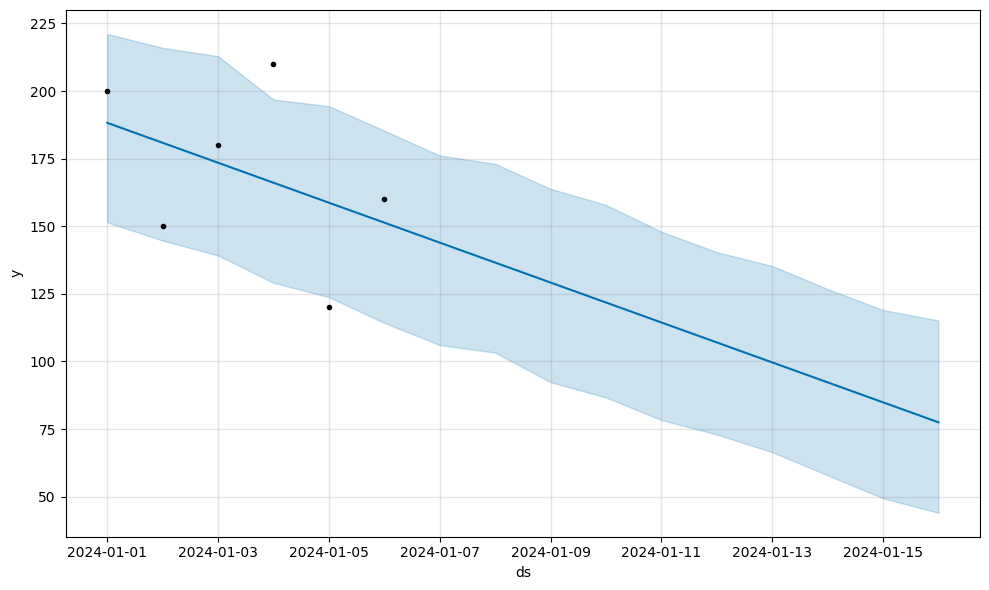

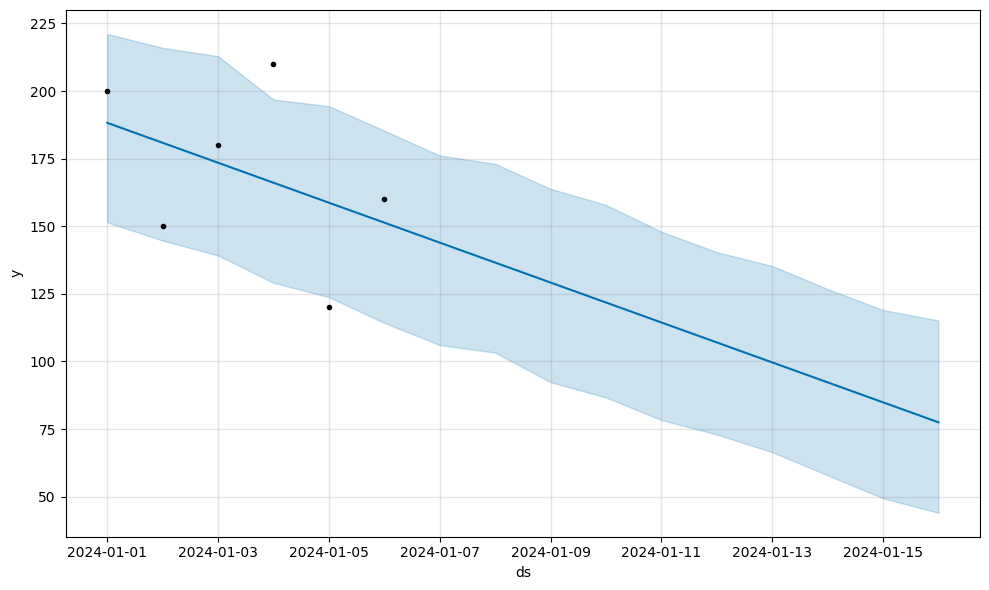

In [34]:
from prophet import Prophet
import pandas as pd

# Prepare the data for Prophet
sales_data = df[['date', 'sales']].copy()
sales_data['date'] = pd.to_datetime(sales_data['date'])  # Convert date to datetime format
sales_data = sales_data.rename(columns={'date': 'ds', 'sales': 'y'})  # Rename columns for Prophet

# Initialize the Prophet model
model = Prophet()

# Fit the model on historical sales data
model.fit(sales_data)

# Create future dates for forecasting (periods argument removed from make_future_dataframe)
future = model.make_future_dataframe(periods=10)

# Predict future sales
forecast = model.predict(future)

# Plot the forecasted sales
fig1 = model.plot(forecast)
# Display the plot in Colab
fig1


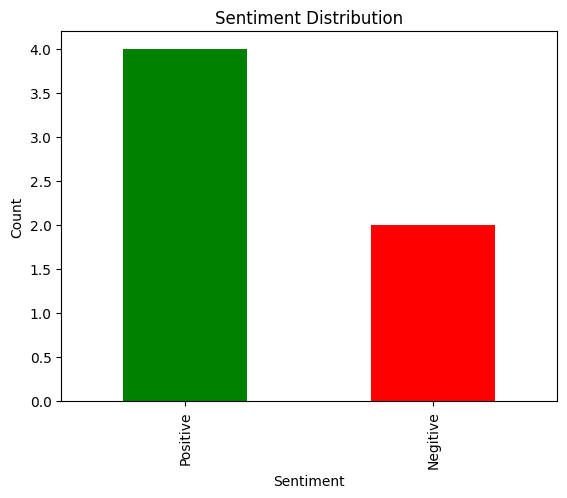

In [35]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


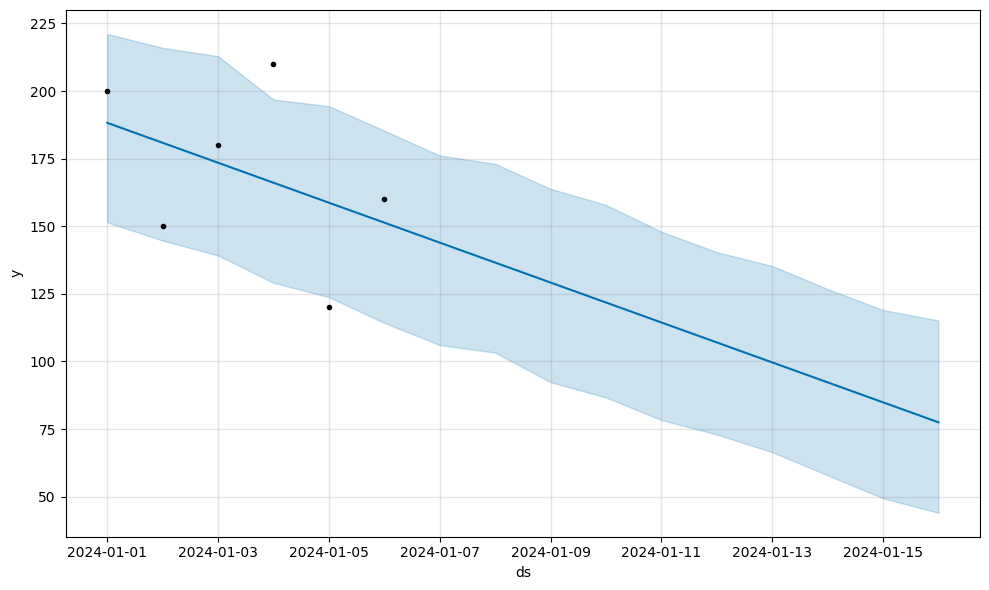

In [36]:
# Prophet model already generates a plot
model.plot(forecast)
plt.show()


In [37]:
# Display forecasted values and confidence intervals
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


           ds        yhat  yhat_lower  yhat_upper
11 2024-01-12  107.020621   72.971285  140.429563
12 2024-01-13   99.636811   66.426328  135.301977
13 2024-01-14   92.253001   57.891668  126.778965
14 2024-01-15   84.869191   49.384046  119.023651
15 2024-01-16   77.485381   44.022256  115.154999


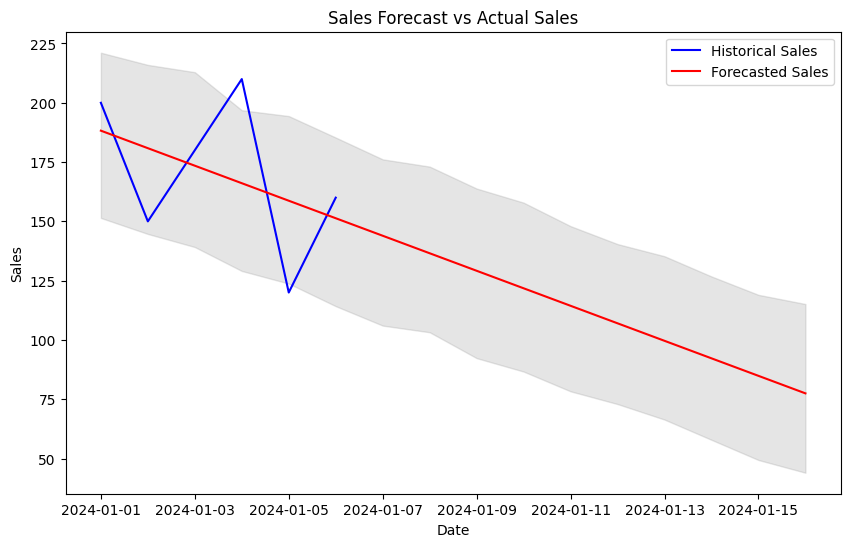

In [38]:
# Plot historical sales and forecasted sales
import matplotlib.pyplot as plt

# Plot historical data (actual sales)
plt.figure(figsize=(10, 6))
plt.plot(sales_data['ds'], sales_data['y'], label='Historical Sales', color='blue')

# Plot forecasted data (predicted sales)
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Sales', color='red')

# Plot the confidence intervals (uncertainty)
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast vs Actual Sales')
plt.legend()
plt.show()


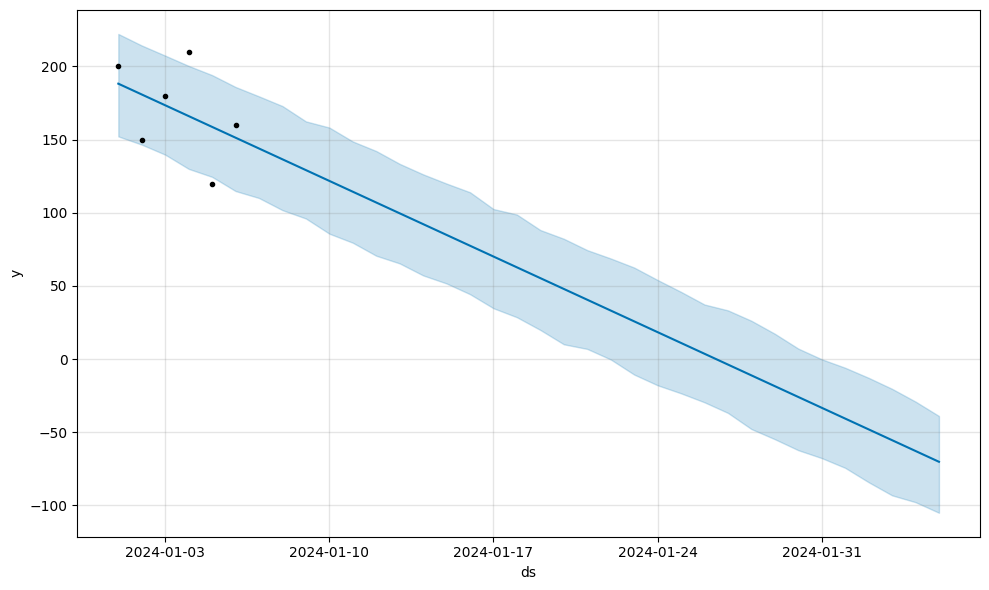

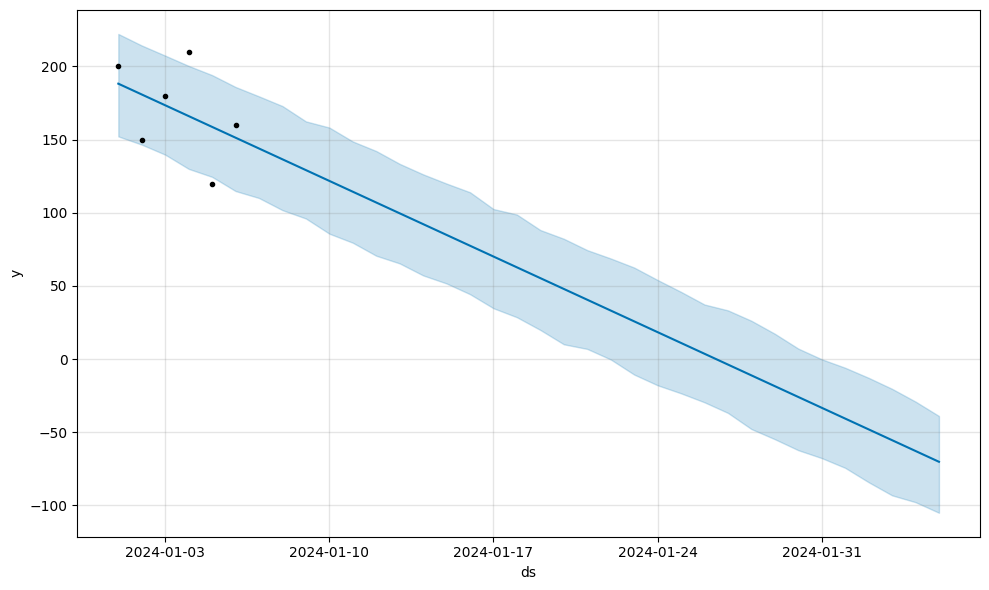

In [39]:
# Create a dataframe with future dates (for forecasting)
future = model.make_future_dataframe(periods=30)  # Predict next 30 days

# Predict future sales
forecast = model.predict(future)

# Plot the forecasted sales
model.plot(forecast)


21:03:23 - cmdstanpy - INFO - Chain [1] start processing
21:03:23 - cmdstanpy - INFO - Chain [1] done processing


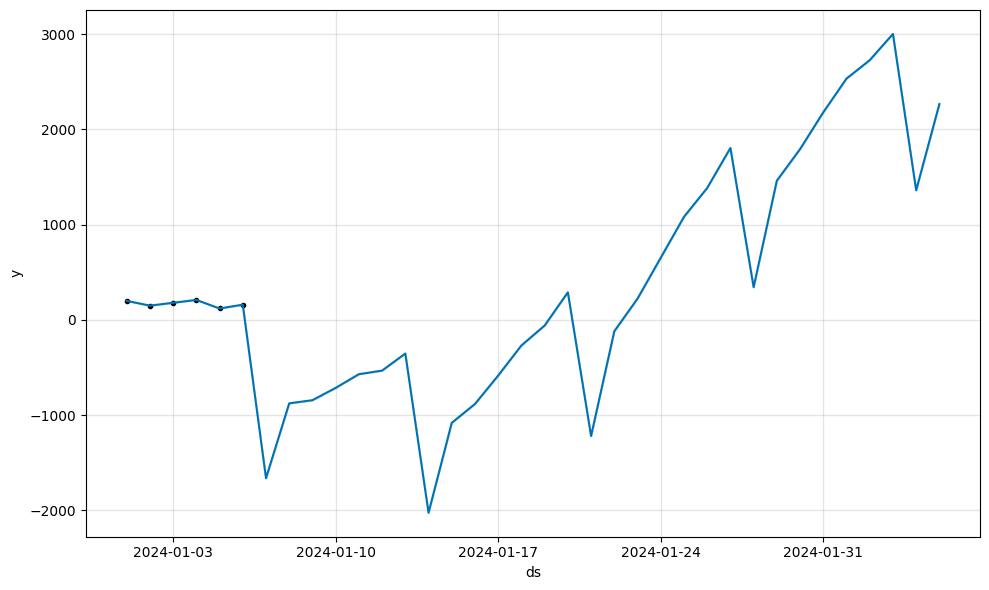

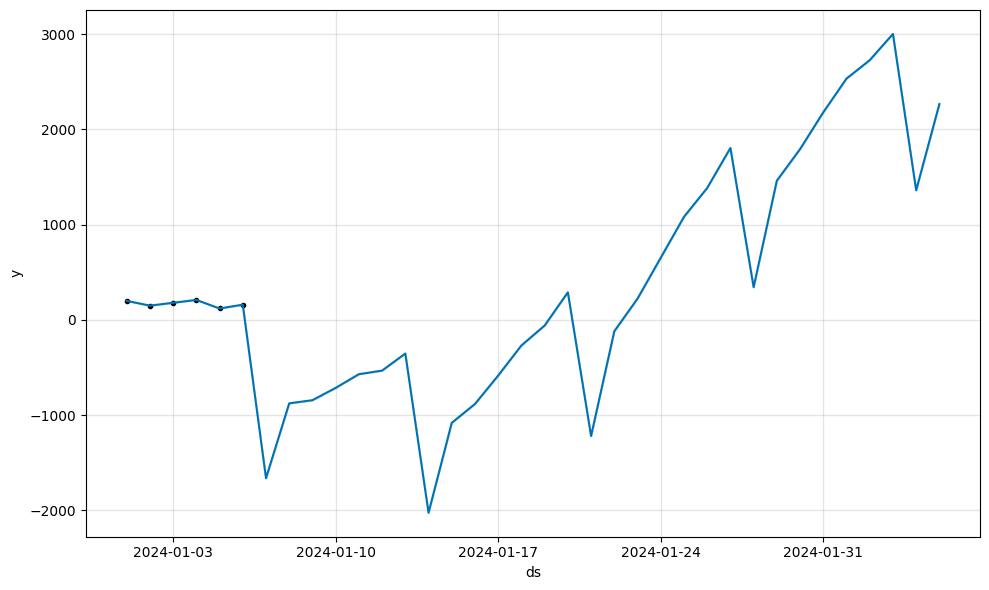

In [40]:
# Initialize Prophet with custom seasonality
model = Prophet(yearly_seasonality=True, weekly_seasonality=True)

# Fit the model again with the original sales data
model.fit(sales_data)

# Create future dataframe and predict again
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot the forecast with added seasonality
model.plot(forecast)


In [41]:
import pickle
from prophet import Prophet

# Assuming 'model' is the trained Prophet model
with open('prophet_model.pkl', 'wb') as f:
    pickle.dump(model, f)
